In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('train_df.csv')
train_zs = pd.read_csv('train_zscore_outlier.csv')
train_iqr = pd.read_csv('train_iqr_outlier.csv')

test = pd.read_csv('test_df.csv')

# Tanpa Menghilangkan Sisa Outlier (Untuk production)

In [3]:
train.head()

,lokasi,kamar_tidur,kamar_mandi,luas_bangunan,luas_lahan,keamanan24jam,taman,balcony,AC,harga
0,sawangan,4,3,150.0,136.0,no,no,no,no,1300000000
1,cimanggis,3,1,80.0,108.0,no,yes,no,no,875000000
2,bojongsari,2,1,45.0,84.0,yes,yes,no,no,917500000
3,depok,2,1,50.0,60.0,no,no,no,no,320000000
4,sukmajaya,3,3,80.0,78.0,yes,yes,yes,yes,1050000000


In [4]:
train.shape, test.shape

((1740, 10), (434, 10))

In [5]:
X_train = train.drop(columns='harga', axis=1)
y_train = train['harga']

In [6]:
# ubah yes/no menjadi 1/0
X_train['keamanan24jam'] = X_train['keamanan24jam'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['taman'] = X_train['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['balcony'] = X_train['balcony'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['AC'] = X_train['AC'].apply(lambda x: 1 if x == 'yes' else 0)

In [7]:
num_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])
cat_pipe = Pipeline([
    ('encode', OneHotEncoder())
])

numeric_features = ['kamar_tidur','kamar_mandi','luas_bangunan','luas_lahan','keamanan24jam','taman','balcony','AC']
categorical_features = ['lokasi']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('cat', cat_pipe, categorical_features)
    ])

In [8]:
X_test = test.drop(columns='harga', axis=1)
y_test = test['harga']

In [9]:
# ubah yes/no menjadi 1/0
X_test['keamanan24jam'] = X_test['keamanan24jam'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['taman'] = X_test['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['balcony'] = X_test['balcony'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['AC'] = X_test['AC'].apply(lambda x: 1 if x == 'yes' else 0)

## Model Pipeline

/tmp/ipykernel_709/4224751148.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)


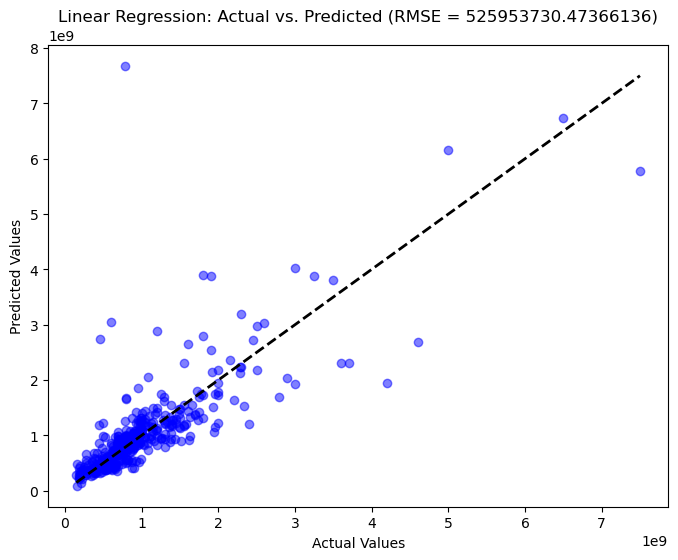

/tmp/ipykernel_709/4224751148.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)


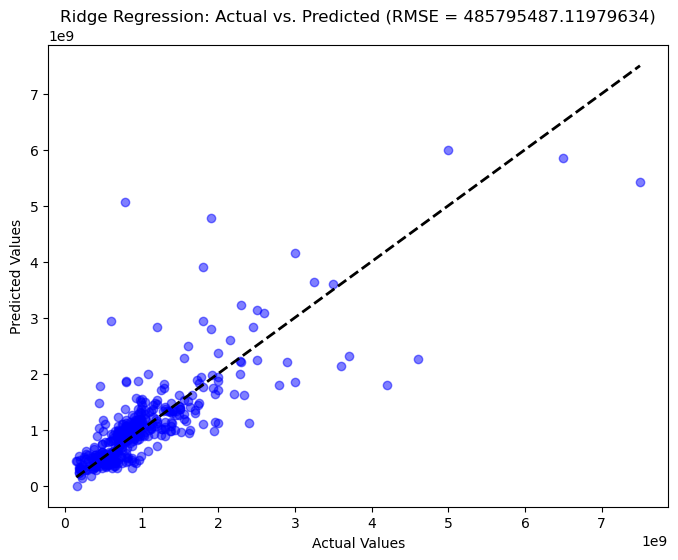

/home/anggapark/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.293e+19, tolerance: 4.660e+17
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_709/4224751148.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)


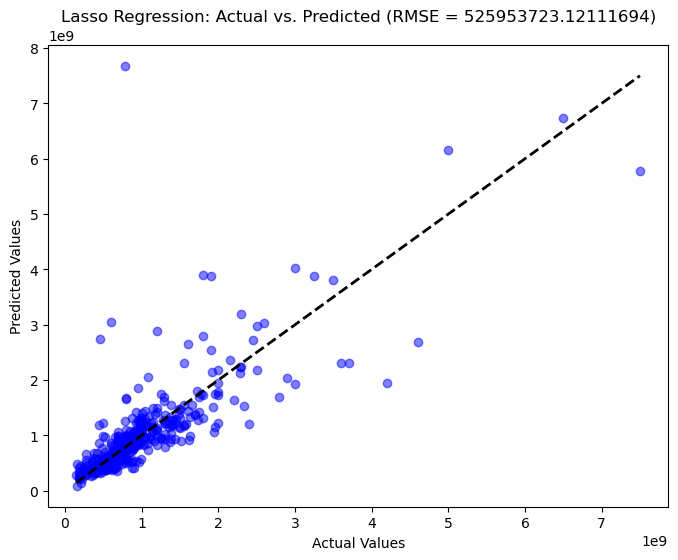

/tmp/ipykernel_709/4224751148.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)


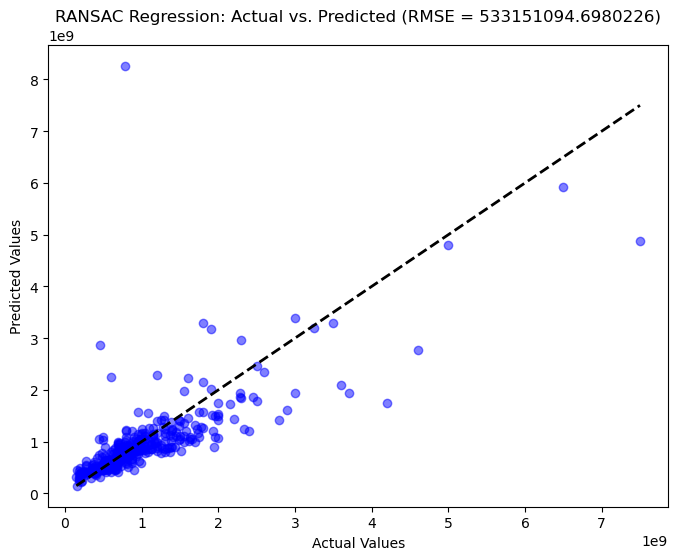

/tmp/ipykernel_709/4224751148.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)


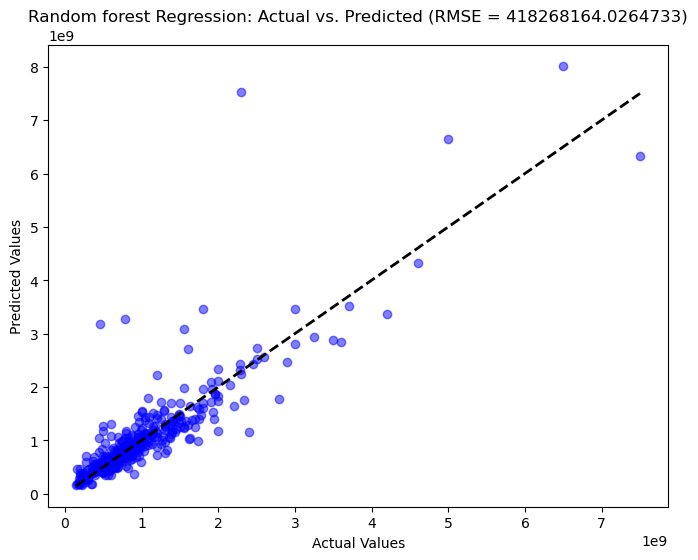

In [10]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random forest Regression', RandomForestRegressor())
]

results_df = pd.DataFrame(columns=['Model', 'RMSE'])

for model_name, model in models:
    pipeline = Pipeline([
        ('Preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results_df = results_df.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Actual vs. Predicted (RMSE = {rmse})")
    plt.show()

In [11]:
results_df

,Model,RMSE
0,Linear Regression,5.259537e+08
1,Ridge Regression,4.857955e+08
2,Lasso Regression,5.259537e+08
3,RANSAC Regression,5.331511e+08
4,Random forest Regression,4.182682e+08


# Dengan outlier Removal (Zscore)

In [12]:
train_zs.head()

,lokasi,kamar_tidur,kamar_mandi,luas_bangunan,luas_lahan,keamanan24jam,taman,balcony,AC,harga
0,sawangan,4,3,150.0,136.0,no,no,no,no,1300000000
1,cimanggis,3,1,80.0,108.0,no,yes,no,no,875000000
2,bojongsari,2,1,45.0,84.0,yes,yes,no,no,917500000
3,depok,2,1,50.0,60.0,no,no,no,no,320000000
4,sukmajaya,3,3,80.0,78.0,yes,yes,yes,yes,1050000000


In [24]:
train_zs.shape

(1675, 10)

In [13]:
X_trainzs = train_zs.drop(columns='harga', axis=1)
# ubah yes/no menjadi 1/0
X_trainzs['keamanan24jam'] = X_trainzs['keamanan24jam'].apply(lambda x: 1 if x == 'yes' else 0)
X_trainzs['taman'] = X_trainzs['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_trainzs['balcony'] = X_trainzs['balcony'].apply(lambda x: 1 if x == 'yes' else 0)
X_trainzs['AC'] = X_trainzs['AC'].apply(lambda x: 1 if x == 'yes' else 0)

y_trainzs = train_zs['harga']

## Model Pipeline

/tmp/ipykernel_709/4010806860.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_zs = results_df_zs.append({'Model': model_name, 'RMSE': rmse_zs}, ignore_index=True)


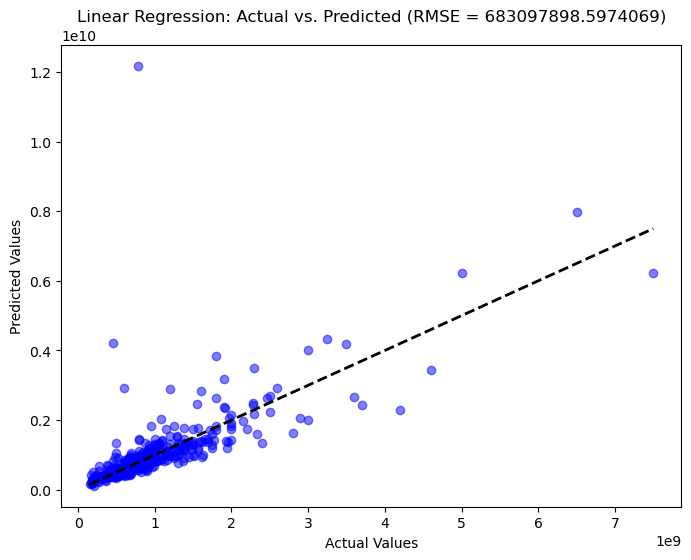

/tmp/ipykernel_709/4010806860.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_zs = results_df_zs.append({'Model': model_name, 'RMSE': rmse_zs}, ignore_index=True)


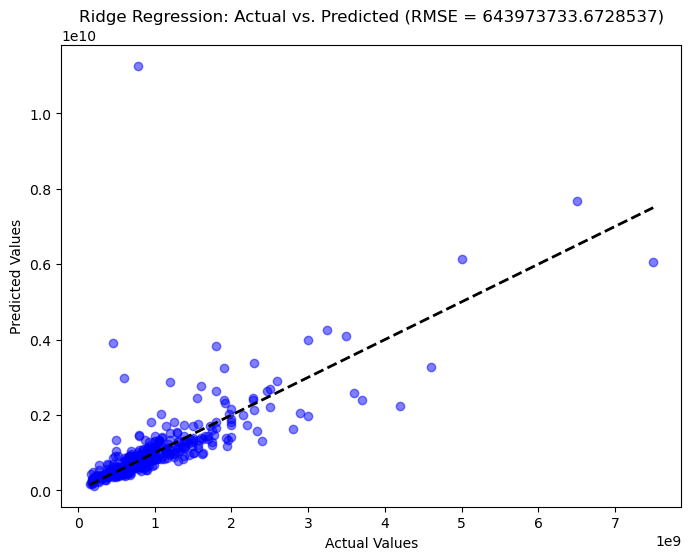

/tmp/ipykernel_709/4010806860.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_zs = results_df_zs.append({'Model': model_name, 'RMSE': rmse_zs}, ignore_index=True)


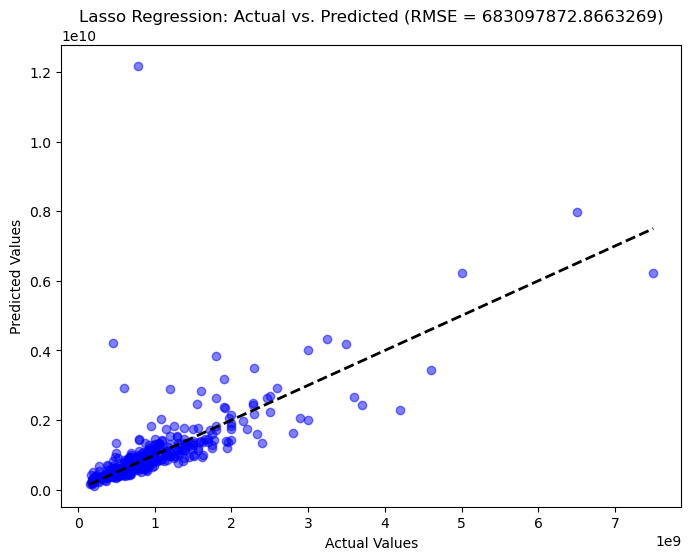

/tmp/ipykernel_709/4010806860.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_zs = results_df_zs.append({'Model': model_name, 'RMSE': rmse_zs}, ignore_index=True)


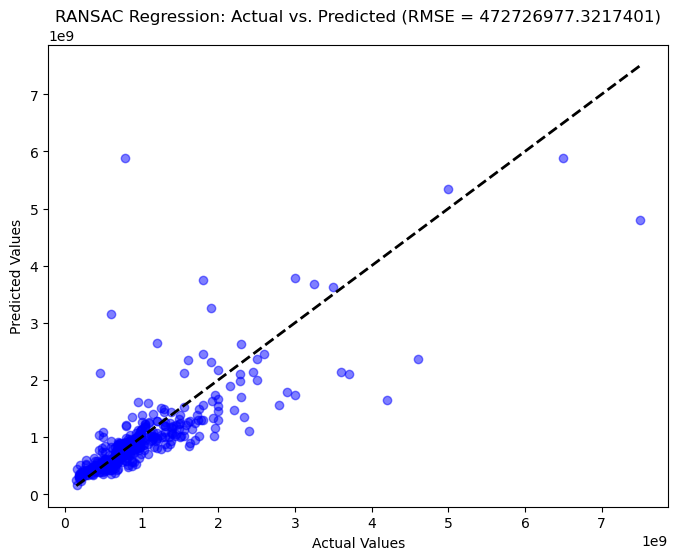

/tmp/ipykernel_709/4010806860.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_zs = results_df_zs.append({'Model': model_name, 'RMSE': rmse_zs}, ignore_index=True)


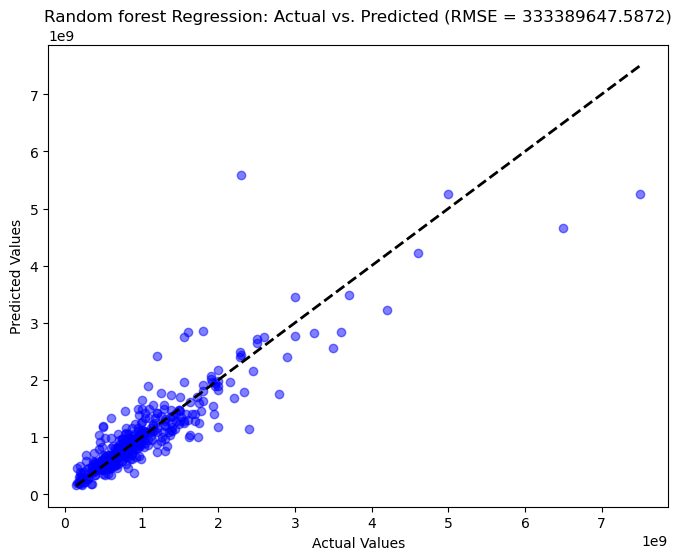

In [14]:
# models = [
#     ('Linear Regression', LinearRegression()),
#     ('Ridge Regression', Ridge()),
#     ('Lasso Regression', Lasso()),
#     ('RANSAC Regression', RANSACRegressor()), 
# ]

results_df_zs = pd.DataFrame(columns=['Model', 'RMSE'])

for model_name, model in models:
    pipeline_zs = Pipeline([
        ('Preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline_zs.fit(X_trainzs, y_trainzs)
    y_pred = pipeline_zs.predict(X_test)
    
    rmse_zs = mean_squared_error(y_test, y_pred, squared=False)
    results_df_zs = results_df_zs.append({'Model': model_name, 'RMSE': rmse_zs}, ignore_index=True)
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Actual vs. Predicted (RMSE = {rmse_zs})")
    plt.show()

In [15]:
results_df_zs

,Model,RMSE
0,Linear Regression,6.830979e+08
1,Ridge Regression,6.439737e+08
2,Lasso Regression,6.830979e+08
3,RANSAC Regression,4.727270e+08
4,Random forest Regression,3.333896e+08


# Dengan Outlier Removal (IQR)

In [16]:
train_iqr.head()

,lokasi,kamar_tidur,kamar_mandi,luas_bangunan,luas_lahan,keamanan24jam,taman,balcony,AC,harga
0,cimanggis,3,1,80.0,108.0,no,yes,no,no,875000000
1,bojongsari,2,1,45.0,84.0,yes,yes,no,no,917500000
2,depok,2,1,50.0,60.0,no,no,no,no,320000000
3,sukmajaya,3,3,80.0,78.0,yes,yes,yes,yes,1050000000
4,sawangan,3,2,72.0,70.0,no,no,no,no,887200000


In [23]:
train_iqr.shape

(1424, 10)

In [17]:
X_trainiqr = train_iqr.drop(columns='harga', axis=1)
# ubah yes/no menjadi 1/0
X_trainiqr['keamanan24jam'] = X_trainiqr['keamanan24jam'].apply(lambda x: 1 if x == 'yes' else 0)
X_trainiqr['taman'] = X_trainiqr['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_trainiqr['balcony'] = X_trainiqr['balcony'].apply(lambda x: 1 if x == 'yes' else 0)
X_trainiqr['AC'] = X_trainiqr['AC'].apply(lambda x: 1 if x == 'yes' else 0)

y_trainiqr = train_iqr['harga']

## Model Pipeline

/tmp/ipykernel_709/1206810937.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_iqr = results_df_iqr.append({'Model': model_name, 'RMSE': rmse_iqr}, ignore_index=True)


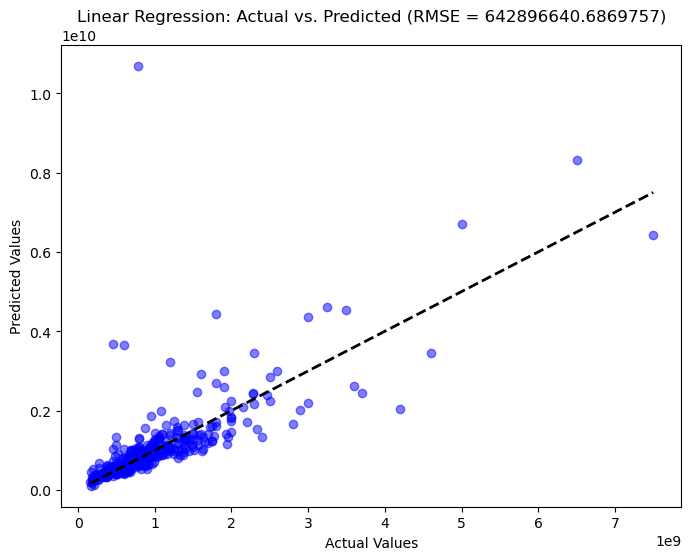

/tmp/ipykernel_709/1206810937.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_iqr = results_df_iqr.append({'Model': model_name, 'RMSE': rmse_iqr}, ignore_index=True)


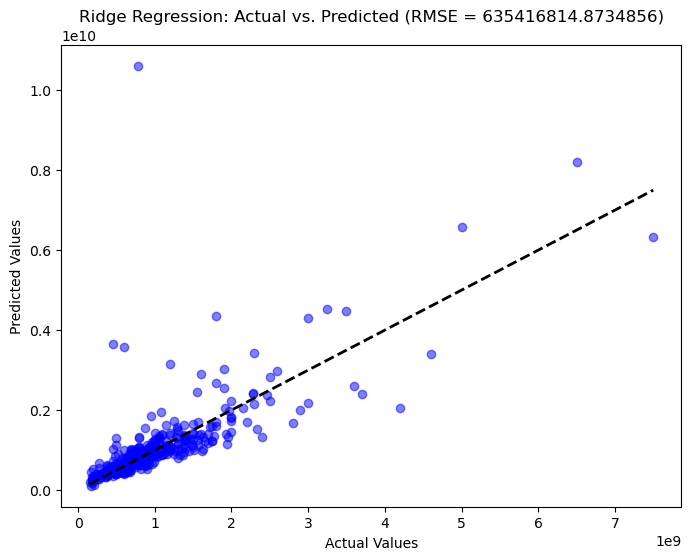

/home/anggapark/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.733e+18, tolerance: 1.648e+16
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_709/1206810937.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_iqr = results_df_iqr.append({'Model': model_name, 'RMSE': rmse_iqr}, ignore_index=True)


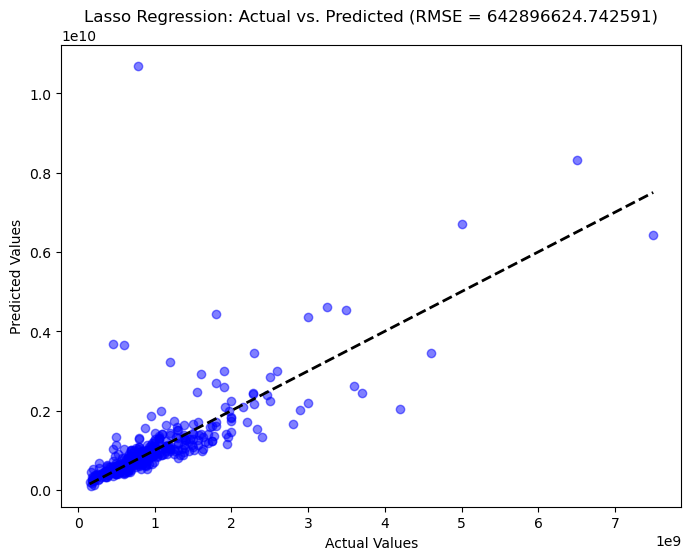

/tmp/ipykernel_709/1206810937.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_iqr = results_df_iqr.append({'Model': model_name, 'RMSE': rmse_iqr}, ignore_index=True)


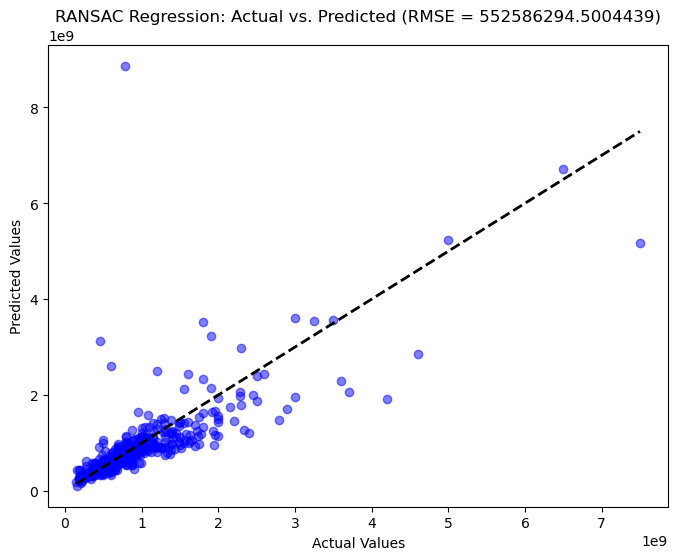

/tmp/ipykernel_709/1206810937.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_iqr = results_df_iqr.append({'Model': model_name, 'RMSE': rmse_iqr}, ignore_index=True)


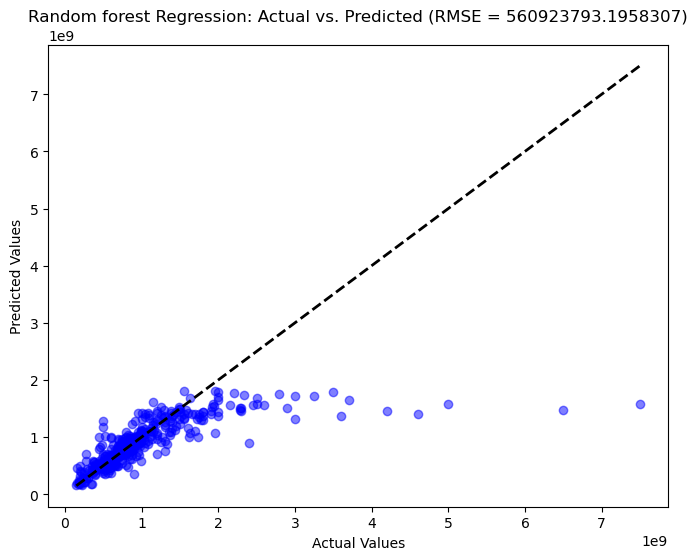

In [18]:
# models = [
#     ('Linear Regression', LinearRegression()),
#     ('Ridge Regression', Ridge()),
#     ('Lasso Regression', Lasso()),
#     ('RANSAC Regression', RANSACRegressor()), 
# ]

results_df_iqr = pd.DataFrame(columns=['Model', 'RMSE'])

for model_name, model in models:
    pipeline_iqr = Pipeline([
        ('Preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline_iqr.fit(X_trainiqr, y_trainiqr)
    y_pred = pipeline_iqr.predict(X_test)
    
    rmse_iqr = mean_squared_error(y_test, y_pred, squared=False)
    results_df_iqr = results_df_iqr.append({'Model': model_name, 'RMSE': rmse_iqr}, ignore_index=True)
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Actual vs. Predicted (RMSE = {rmse_iqr})")
    plt.show()

In [19]:
results_df_iqr

,Model,RMSE
0,Linear Regression,6.428966e+08
1,Ridge Regression,6.354168e+08
2,Lasso Regression,6.428966e+08
3,RANSAC Regression,5.525863e+08
4,Random forest Regression,5.609238e+08


# Perbandingan

In [20]:
results_df = results_df.rename(columns={'RMSE': 'RMSE Tanpa Outlier Removal'})
results_df_zs = results_df_zs.rename(columns={'RMSE': 'RMSE (Outlier Removal dengan ZScore)'})
results_df_iqr = results_df_iqr.rename(columns={'RMSE': 'RMSE (Outlier Removal dengan IQR)'})

result_df = pd.concat([results_df, results_df_zs['RMSE (Outlier Removal dengan ZScore)'], results_df_iqr['RMSE (Outlier Removal dengan IQR)']], axis=1)

In [21]:
result_df

,Model,RMSE Tanpa Outlier Removal,RMSE (Outlier Removal dengan ZScore),RMSE (Outlier Removal dengan IQR)
0,Linear Regression,5.259537e+08,6.830979e+08,6.428966e+08
1,Ridge Regression,4.857955e+08,6.439737e+08,6.354168e+08
2,Lasso Regression,5.259537e+08,6.830979e+08,6.428966e+08
3,RANSAC Regression,5.331511e+08,4.727270e+08,5.525863e+08
4,Random forest Regression,4.182682e+08,3.333896e+08,5.609238e+08


Dapat dilihat pada tabel di atas, nilai RMSE dari model Random Forest Regression dengan perlakuan outlier removal dengan metode ZScore adalah yang terendah dibanding dengan nilai RMSE lainnya, yaitu sekitar 3.333896e+08	

Untuk data tanpa outlier removal method, model Random Forest regression juga memiliki nilai RMSE terendah dibanding model lainnya

## Save Model

In [25]:
pipeline_zs = Pipeline([
    ('Preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

pipeline_zs.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['kamar_tidur', 'kamar_mandi',
                                                   'luas_bangunan',
                                                   'luas_lahan',
                                                   'keamanan24jam', 'taman',
                                                   'balcony', 'AC']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['lokasi'])])),
                ('model', RandomForestRegressor())])

In [26]:
import joblib

model_filename = 'regression_model.joblib'
joblib.dump(pipeline, model_filename)

['regression_model.joblib']